# Module 2 Project Delphi Football Data

For this project, our goal is to 
- get the data we think is important from this SQL database,
- do some calculations and data transformation, 
- and then store everything in a MongoDB database.

Let's get into the specifics of this project.

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this kaggle page. Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database.
Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:
* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season.


At a Minimum:

- Query the SQL database
- Calculate summary statistics
- Get the weather data from the DarkSky API
- Load the data into MongoDB

## Importing the libraries

In [51]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

import dotenv
from dotenv import load_dotenv
import requests

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Making a Query to the SQL Database

Make a Query variable that I can select what I want from the relevant table in the database. 
Then using pd.read_sql_query, pandify that table.

In [2]:
query = ('''SELECT *
            FROM Matches
            WHERE Season = '2011' and Div != 'E0'
            ''')
            
df = pd.read_sql_query(query, conn)
df

# query2 = ('''SELECT FTAG, AwayTeam as TeamName
#             FROM Matches
#             WHERE Season = '2011' and Div != 'E0' ''')
# df2 = pd.read_sql_query(query2, conn)
# df2

# Tot_goals = df1.join(df2.set_index('TeamName'), on='TeamName')
# Tot_goals['total_goals'] = Tot_goals['FTHG'] + Tot_goals['FTAG']
# Tot_goals.groupby('TeamName').sum()


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
607,1699,D2,2011,2011-07-24,Paderborn,Fortuna Dusseldorf,1,1,D
608,1700,D2,2011,2011-12-10,Bochum,Fortuna Dusseldorf,1,1,D
609,1701,D2,2011,2011-08-15,Ein Frankfurt,Fortuna Dusseldorf,1,1,D
610,1702,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D


# Question 1:
##The name of the team AND The total number of goals scored by the team during the 2011 season

In [3]:
#Khairuls code:
query1 = ("""SELECT Team_name, SUM(Total_goals)
           FROM (
                 SELECT ut.TeamName AS Team_name, SUM(m.FTHG) AS Total_goals
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.HomeTeam
                 WHERE m.Season == 2011 AND Div != 'E0'
                 GROUP BY Team_name 
                 
                 UNION ALL
                 
                 SELECT ut.TeamName Team_name, SUM(m.FTAG) AS Total_goals
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.AwayTeam
                 WHERE m.Season == 2011 AND Div != 'E0'
                 GROUP BY Team_name 
                )
           GROUP BY Team_name 
           """)   

In [6]:

df1 = pd.read_sql_query(query1, conn)

In [7]:
df1

,Team_name,SUM(Total_goals)
0,Aachen,30
1,Augsburg,36
2,Bayern Munich,77
3,Bochum,41
4,Braunschweig,37
5,Cottbus,30
6,Dortmund,80
7,Dresden,50
8,Duisburg,42
9,Ein Frankfurt,76


## QUESTION 2: TOTAL WINS Each TEAM earned During 2011 Season


In [8]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
607,1699,D2,2011,2011-07-24,Paderborn,Fortuna Dusseldorf,1,1,D
608,1700,D2,2011,2011-12-10,Bochum,Fortuna Dusseldorf,1,1,D
609,1701,D2,2011,2011-08-15,Ein Frankfurt,Fortuna Dusseldorf,1,1,D
610,1702,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D


In [16]:
query2 = ("""SELECT Team_name, SUM(WINS) AS Wins
           FROM (
                 SELECT ut.TeamName AS Team_name, COUNT(m.FTR) AS WINS
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.HomeTeam
                 WHERE m.Season == 2011 AND Div != 'E0' AND FTR = 'H'
                 GROUP BY Team_name 
                 
                 UNION ALL
                 
                 SELECT ut.TeamName Team_name, COUNT(m.FTR) AS WINS
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.AwayTeam
                 WHERE m.Season == 2011 AND Div != 'E0' AND FTR = 'A'
                 GROUP BY Team_name 
                )
           GROUP BY Team_name 
           """)   

In [17]:
df2 = pd.read_sql_query(query2, conn)
df2

,Team_name,Wins
0,Aachen,6
1,Augsburg,8
2,Bayern Munich,23
3,Bochum,10
4,Braunschweig,10
5,Cottbus,8
6,Dortmund,25
7,Dresden,12
8,Duisburg,10
9,Ein Frankfurt,20


# Histogram Visualisation of Teams wins and losses


In [18]:
query3 = ("""SELECT Team_name, SUM(LOSSES) AS Losses
           FROM (
                 SELECT ut.TeamName AS Team_name, COUNT(m.FTR) AS LOSSES
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.HomeTeam
                 WHERE m.Season == 2011 AND Div != 'E0' AND FTR = 'A'
                 GROUP BY Team_name 
                 
                 UNION ALL
                 
                 SELECT ut.TeamName Team_name, COUNT(m.FTR) AS LOSSES
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.AwayTeam
                 WHERE m.Season == 2011 AND Div != 'E0' AND FTR = 'H'
                 GROUP BY Team_name 
                )
           GROUP BY Team_name 
           """)   

df3 = pd.read_sql_query(query3, conn)
df3

,Team_name,Losses
0,Aachen,15
1,Augsburg,12
2,Bayern Munich,7
3,Bochum,17
4,Braunschweig,9
5,Cottbus,15
6,Dortmund,3
7,Dresden,13
8,Duisburg,15
9,Ein Frankfurt,6


In [44]:
win_loss_df = df2.set_index('Team_name').join(df3.set_index('Team_name'))
win_loss_df.reset_index(inplace=True)
win_loss_df

,Team_name,Wins,Losses
0,Aachen,6,15
1,Augsburg,8,12
2,Bayern Munich,23,7
3,Bochum,10,17
4,Braunschweig,10,9
5,Cottbus,8,15
6,Dortmund,25,3
7,Dresden,12,13
8,Duisburg,10,15
9,Ein Frankfurt,20,6


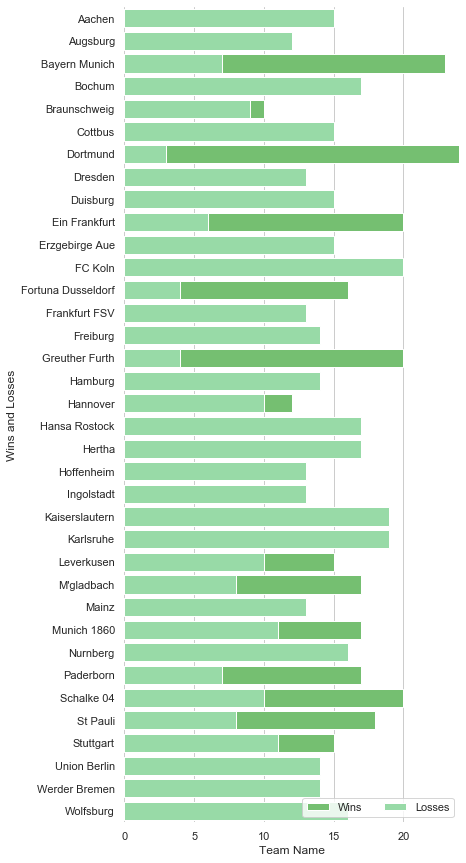

In [65]:
# sns.barplot(x=win_loss_df['Team_name'], y=win_loss_df['Wins'])
# sns.set(style="whitegrid")
# f, ax = plt.subplots(figsize=(6, 15))

# sns.set_color_codes("muted")
# sns.barplot(x='Wins', y='Team_name', data=win_loss_df,
#             label="Wins", color="g")
# sns.set_color_codes("pastel")
# sns.barplot(x="Losses", y="Team_name", data=win_loss_df,
#             label="Losses", color="g")

# #Add a legend and informative Axes label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="Wins and Losses",
#        xlabel="Team Name")
# sns.despine(left=True, bottom=True)

### Using SQL to query for the necessary data relevent to this investigation: 

In [177]:
# query = ('''SELECT ut.TeamName, sum(m.FTHG + m.FTAG) AS Tot_goals
#             FROM Matches m
#             JOIN Unique_Teams ut 
#             ''')

df = pd.read_sql_query(query, conn)
df.head()

,FTHG,TeamName
0,0,Nurnberg
1,1,Stuttgart
2,0,Wolfsburg
3,3,Mainz
4,0,Freiburg


Lets check the null values in this Subset

In [178]:
df.isna().sum()

FTHG        0
TeamName    0
dtype: int64

In [179]:
 df.duplicated().sum()

434

Perfect lets create some aggregate variables using this data:


In [180]:
df

,FTHG,TeamName
0,0,Nurnberg
1,1,Stuttgart
2,0,Wolfsburg
3,3,Mainz
4,0,Freiburg
...,...,...
607,1,Paderborn
608,1,Bochum
609,1,Ein Frankfurt
610,0,Aachen


In [34]:
d

array(['Nurnberg', 'Stuttgart', 'Wolfsburg', 'Mainz', 'Freiburg',
       "M'gladbach", 'Hamburg', 'Werder Bremen', 'Schalke 04', 'Hannover',
       'Hoffenheim', 'Leverkusen', 'Kaiserslautern', 'Hertha', 'Augsburg',
       'FC Koln', 'Dortmund', 'Bayern Munich', 'Hansa Rostock', 'Bochum',
       'Ein Frankfurt', 'Paderborn', 'Greuther Furth',
       'Fortuna Dusseldorf', 'Ingolstadt', 'Cottbus', 'St Pauli',
       'Frankfurt FSV', 'Union Berlin', 'Munich 1860', 'Aachen',
       'Karlsruhe', 'Braunschweig', 'Erzgebirge Aue', 'Duisburg',
       'Dresden'], dtype=object)

# Testing to_dict on the dataframe results

In [48]:
ddf = df.to_dict()
ddf.k

In [51]:
ddf.keys()

dict_keys(['Match_ID', 'Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'])

# Api getter


In [ ]:
API : URL https://api.darksky.net/forecast/1943c3bf2e7ecf55aa2640f7b86097b8/37.8267,-122.4233

In [96]:
Key = '1943c3bf2e7ecf55aa2640f7b86097b8'

In [136]:
#Berlin
longitude = 13.4050
latitude = 52.5200

In [188]:

# dateQuery = ('''SELECT Date, FTHG, HomeTeam as TeamName
#             FROM Matches
#             WHERE Season = '2011' and Div != 'E0' ''')
# df3 = pd.read_sql_query(dateQuery, conn)

In [147]:
df3['Date'][0]
from datetime import datetime

In [173]:
# Needs alot of work

dates = pd.to_datetime(df3['Date'])
date = dates[0]

date = int(datetime.timestamp(date))
date

1333148400

In [186]:
#Time machine request from Dark sky
#Returns 8-12 Responses.... Why?

r = requests.get(f'https://api.darksky.net/forecast/{Key}/{latitude},{longitude},{date}')

len(r)

8

# Khairul SQL Code for Total Goals

In [168]:
query4 = """SELECT Team_name, SUM(Total_goals) Total_goals
           FROM 
                (
                 SELECT ut.TeamName Team_name,
                        SUM(m.FTHG) Total_goals
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.HomeTeam
                 WHERE m.Season == 2011 
                 GROUP BY Team_name 
                 UNION ALL
                 SELECT ut.TeamName Team_name,
                        SUM(m.FTAG) Total_goals
                 FROM unique_teams ut 
                 JOIN matches m
                 ON ut.TeamName = m.AwayTeam
                 WHERE m.Season == 2011
                 GROUP BY Team_name 
                )
           GROUP BY Team_name 
           """    

In [171]:
dfcheck = pd.read_sql_query(query4, conn)
dfcheck

,Team_name,Total_goals
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77
5,Blackburn,48
6,Bochum,41
7,Bolton,46
8,Braunschweig,37
9,Chelsea,65


# Loading to MongoDB


In [185]:
python -m pip install pymongo

SyntaxError: invalid syntax (<ipython-input-185-e2a04d47df7b>, line 1)

In [184]:
import pymongo
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

# grab a database from your server 
mydb = myclient['example_data']

ModuleNotFoundError: No module named 'pymongo'